In [1]:
pip install opencv-python

Note: you may need to restart the kernel to use updated packages.


In [2]:
pip install cvlib

Note: you may need to restart the kernel to use updated packages.


In [3]:
import cv2
import cvlib as cv
import sys
import numpy as np
from numpy.lib.type_check import imag

In [4]:
image = cv2.imread('me.JPG')

In [5]:
face, confidence = cv.detect_face(image)
padding = 20

for i in face:
        (x, y) = max(0, i[0]-padding), max(0, i[1]-padding)
        (x2, y2) = min(image.shape[1]-1, i[2]+padding), min(image.shape[0]-1,i[3]+padding)
        cv2.rectangle(image, (x, y), (x2, y2), (0, 255, 0), 2)
        crop = np.copy(image[y:y2, x:x2])
        (label, confidence) = cv.detect_gender(crop)
        idx = np.argmax(confidence)
        label = label[idx]
        label = '{}: {:.2f}%'.format(label, confidence[idx] * 100)
        Y = y - 10 if y -10 > 10 else y + 10
        cv2.putText(image, label, (y, Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 255, 0), 2)


[INFO] Initializing gender detection model ..


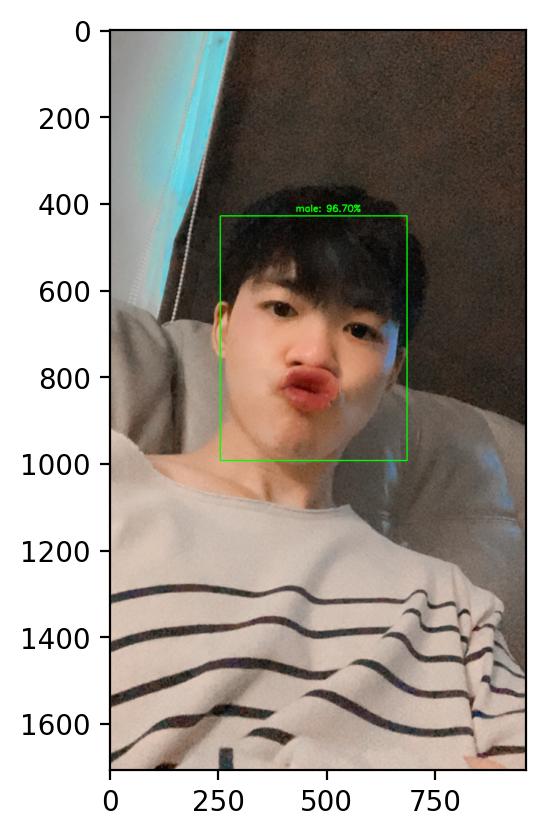

In [6]:
import matplotlib.pyplot as plt
plt.figure(dpi=200)
plt.imshow(image[:,:,::-1])
plt.show()

In [7]:
webcam = cv2.VideoCapture(0)

padding = 20
while webcam.isOpened():
    status, frame = webcam.read()
    frame = cv2.flip(frame, 1)
    face, confidence = cv.detect_face(frame)
    for idx, f in enumerate(face):        
        (startX,startY) = max(0, f[0]-padding), max(0, f[1]-padding)
        (endX,endY) = min(frame.shape[1]-1, f[2]+padding), min(frame.shape[0]-1, f[3]+padding)
        cv2.rectangle(frame, (startX,startY), (endX,endY), (0,255,0), 2)
        face_crop = np.copy(frame[startY:endY, startX:endX]) 
        (label, confidence) = cv.detect_gender(face_crop)
        idx = np.argmax(confidence)
        label = label[idx]
        label = "{}: {:.2f}%".format(label, confidence[idx] * 100)
        Y = startY - 10 if startY - 10 > 10 else startY + 10
        cv2.putText(frame, label, (startX,Y), cv2.FONT_HERSHEY_SIMPLEX, 0.7,
                    (0,255,0), 2)
    cv2.imshow('Real-time gender detection', frame)

    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
    
webcam.release()
cv2.destroyAllWindows()  

error: OpenCV(4.6.0) /Users/xperience/actions-runner/_work/opencv-python/opencv-python/opencv/modules/imgproc/src/resize.cpp:4052: error: (-215:Assertion failed) !ssize.empty() in function 'resize'
